# Task 1: Face Recognition using PCA and LDA

### Import Statements

In [1]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
from pca_lda_ae_helper import *

### Load the FacePix Dataset
* train_images and test_images are lists of np.ndarrays
* train_labels and test_labels are lists of ints
* All 4 lists should have equal length of 630

In [2]:
image_path = "/home/jo_wang/Desktop/ECE661/HW10/FaceRecognition"
train_images, train_labels, test_images, test_labels = load_face_data(image_path)
assert(len(train_images) == len(train_labels))
assert(len(test_images) == len(test_labels))
assert(len(train_images) == 630)
assert(len(test_images) == 630)

### Vectorize the Image
* vec_train_image and vec_test_image contain the vectorized images in one array
* their shapes are both (16384, 630)
* Each column of both np.ndarrays corresponds to a single image represented as a 1-D vector

In [3]:
vec_train_image = np.zeros((train_images[0].shape[0] * train_images[0].shape[1], len(train_images)), dtype=float)
vec_test_image = np.zeros((test_images[0].shape[0] * test_images[0].shape[1], len(test_images)), dtype=float)
assert(vec_train_image.shape == vec_test_image.shape)
assert(vec_train_image.shape == (16384, 630))

for i, image in enumerate(train_images):
    vec_train_image[:,i] = image.flatten()

for i, image in enumerate(test_images):
    vec_test_image[:,i] = image.flatten()


### Normalize the Image Vectors
1. Subtract the mean
2. Divide by the standard deviation

In [4]:
train_mean = np.mean(vec_train_image, axis=1)
vec_train_image = vec_train_image - train_mean.reshape(16384,1)
vec_test_image = vec_test_image - train_mean.reshape(16384,1)

for i in range(vec_train_image.shape[1]):
    vec_train_image[:,i] = vec_train_image[:,i] / np.linalg.norm(vec_train_image[:,i])
    vec_test_image[:,i] = vec_test_image[:,i] / np.linalg.norm(vec_test_image[:,i])

### Peform PCA Dimensionality Reduction
Let $X = \begin{bmatrix} x_1 & x_2 & x_3 & \dots & x_n \end{bmatrix}$ be the matrix of vectorized and normalized images (need one for train and one for test set)

1. Compute the Covariance Matrix as $C = X^TX$
2. Find $u$ has the eigenvectors of $C$
3. Subspace $W = XU^T$
4. K-dimensionality subspace is the first K columns of W denoted $W_k$
5. Normalize all columns in $W_k$ to be unit magnitude
6. Project both train and test images into the $W_k$ subspace as: $y = W_k^T(X - m)$
7. Fit KNN Classifier with the train data set and inference on the test data set

Text(0, 0.5, 'Accuracy Rate')

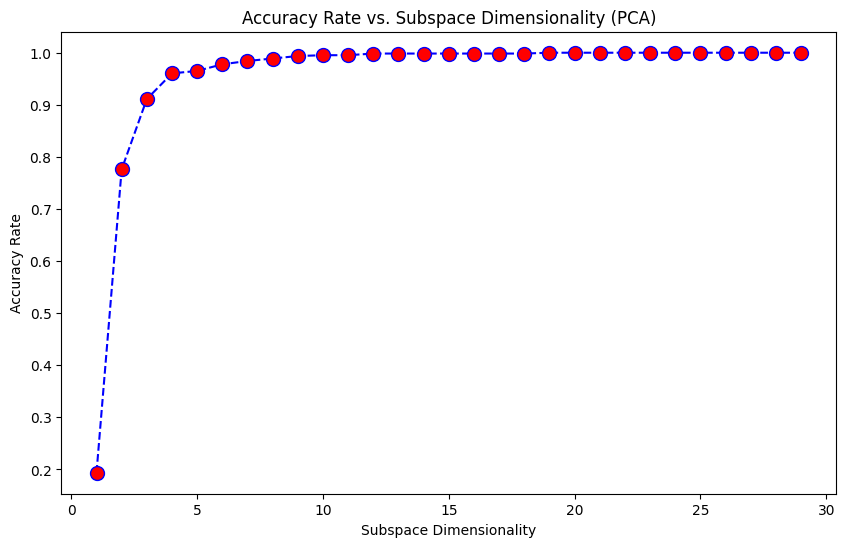

In [5]:
PCA_accuracy_rate = PCA(vec_train_image, vec_test_image, train_labels, test_labels)
plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), PCA_accuracy_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Accuracy Rate vs. Subspace Dimensionality (PCA)')
plt.xlabel('Subspace Dimensionality')
plt.ylabel('Accuracy Rate')

### Perform LDA Dimensionality Reduction

Text(0, 0.5, 'Accuracy Rate')

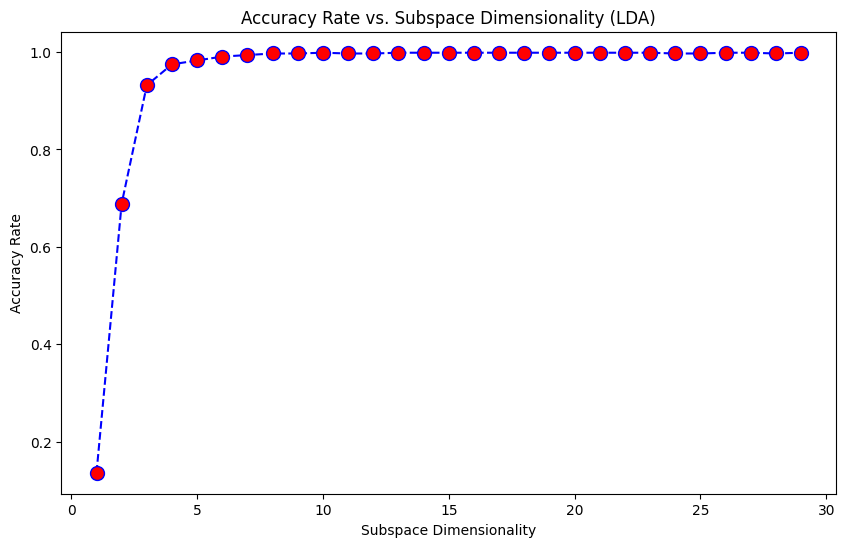

In [6]:
LDA_accuracy_rate = LDA(vec_train_image, vec_test_image, train_labels, test_labels)
plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), LDA_accuracy_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Accuracy Rate vs. Subspace Dimensionality (LDA)')
plt.xlabel('Subspace Dimensionality')
plt.ylabel('Accuracy Rate')

### Comparison in Performance Between PCA and LDA

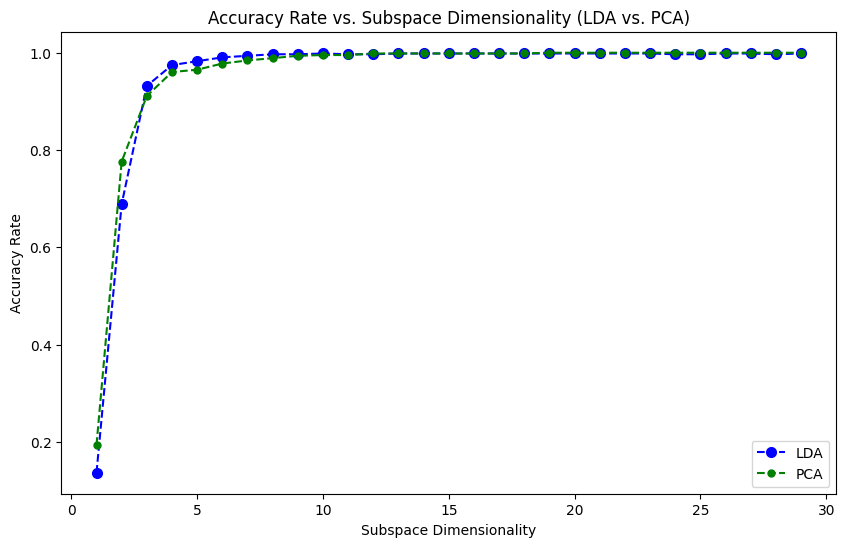

In [24]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), LDA_accuracy_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='blue', markersize = 7, label="LDA")
plt.plot(range(1, 30), PCA_accuracy_rate, color ='green',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='green', markersize = 5, label="PCA")

plt.title('Accuracy Rate vs. Subspace Dimensionality (LDA vs. PCA)')
plt.xlabel('Subspace Dimensionality')
plt.ylabel('Accuracy Rate')
plt.legend(loc='lower right')